# Hybrid algorithm. Parameter investigation. Evaluation

Base settings: <br/>
1. #of items total = 1000
2. baseround_items = 20
3. LR = 10
4. machine_selection_confidence = 0.95
5. mahine_machine_tests = 50
5. items_num = 5
6. J = 3
7. Proportion "IN" items = 0.3
8. #of filters = 4
9. thrsh for "OUT" = 0.99
10. corr values in [0., 0.2, 0.3, 0.5, 0.7, 0.9]
11. machine acuracies is in 0.5-0.95
12. crowd cost = 1 per filter
12. expert cost = 20 per paper
13. results are averaged by 50 repetitions


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from operator import truediv

In [2]:
# ![alt text](imagename.png "Title")

In [3]:
title_size = 27
axes_size = 24
legend_size = 22
marker_size= 7
line_width = 2
label_size = 16
err_line_width = 1
caps_size=2
fig_size = (10, 9)

In [4]:
def plot_chart(data, title, y_limit=None):
    fig, ax = plt.subplots(figsize=fig_size)
    colors = ['darkorange', 'darkorange', 'black', 'black', 'blue', 'blue']
    algos = ['Machines-Ensemble', 'Hybrid-Ensemble', 'Crowd-Ensemble']
    ax.set_color_cycle(colors)

    markers = ['*', 'o', '^']
    def plot_alg(data, alg, marker):
        y = data.loc[(data['algorithm'] == alg)]['loss_mean'].values
        x = data.loc[(data['algorithm'] == alg)]['price_mean'].values
        err_y = data.loc[(data['algorithm'] == alg)]['loss_std'].values
        plt.plot(x, y, label=alg, marker=marker, linewidth=line_width, markersize=marker_size)
        plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker)
    plt.title(title, size=title_size, fontweight='bold')
    plt.xlabel('Price', size=axes_size)
    plt.ylabel('Loss', size=axes_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=label_size)
    plt.grid()
    if y_limit:
        plt.ylim(y_limit)
#     fig.savefig('base_fig2.png', format='png', dpi=700)



def plot_chart_recall(data, title, y_limit=None):
    fig, ax = plt.subplots(figsize=fig_size)
    colors = ['darkorange', 'darkorange', 'black', 'black', 'blue', 'blue']
    algos = ['Machines-Ensemble', 'Hybrid-Ensemble', 'Crowd-Ensemble']
    ax.set_color_cycle(colors)

    markers = ['*', 'o', '^']
    def plot_alg(data, alg, marker):
        y = data.loc[(data['algorithm'] == alg)]['recall'].values
        x = data.loc[(data['algorithm'] == alg)]['price_mean'].values
        err_y = data.loc[(data['algorithm'] == alg)]['recall_std'].values
        plt.plot(x, y, label=alg, marker=marker, linewidth=line_width, markersize=marker_size)
        plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker)
    plt.title(title, size=title_size, fontweight='bold')
    plt.xlabel('Price', size=axes_size)
    plt.ylabel('Recall', size=axes_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=label_size)
    plt.grid()
    if y_limit:
        plt.ylim(y_limit)
#     fig.savefig('base_fig2.png', format='png', dpi=700)

# 1. Chart: Base settings

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


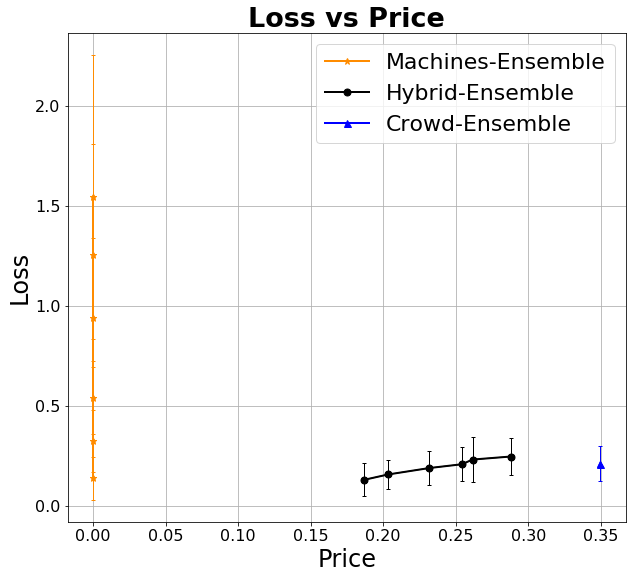

In [5]:
data = pd.read_csv('../output_data/fig0_base_settings.csv')
data['price_mean'] /= 20
data['price_std'] /= 20
title = 'Loss vs Price'

plot_chart(data, title)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


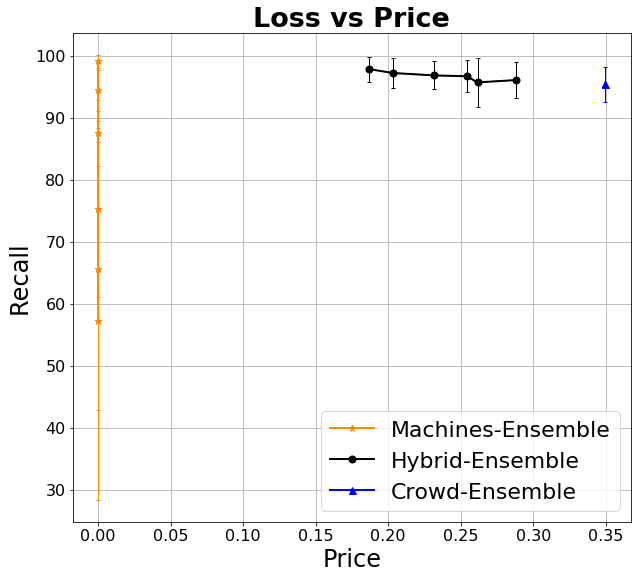

In [6]:
data = pd.read_csv('../output_data/fig0_base_settings.csv')

data['price_mean'] /= 20
data['price_std'] /= 20
title = 'Loss vs Price'

plot_chart_recall(data, title)

# 2. Chart: (Vary #of tests for machines)

#of tests for machines = [ 15,  20,  30,  40,  50, 100, 150, 200, 500]

In [7]:
# data = pd.read_csv('../output_data/fig3_tests_num.csv')
# fig, ax = plt.subplots(figsize=fig_size)

# y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_mean'].values
# err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_std'].values
# plt.plot(0, y_srun, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width)
# plt.errorbar(0, y_srun, yerr=err_srun, marker='^', elinewidth=err_line_width, color='blue', capsize=caps_size)

# x = [15.,   20.,   30.,   40.,   50.,  100.,  150.,  200.,  500.]
# corr = data['corr'].unique()
# for c in corr:
#     y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_mean'].values
# #     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == t)]['price_mean'].values
#     err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_std'].values
#     plt.plot(x, y, label='Hybrid-Ensemble', marker='o', color='b', linewidth=err_line_width)
#     plt.errorbar(x, y, yerr=err, marker='o', elinewidth=err_line_width, color='black', capsize=caps_size)

# plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=title_size, fontweight='bold')
# plt.xlabel('#of tests for machines', size=axes_size)
# plt.ylabel('Loss', size=axes_size)
# # plt.legend(fontsize = legend_size)
# plt.xticks(x)
# plt.tick_params(axis='both', which='major', labelsize=label_size)
# plt.grid()

In [8]:
# fig, ax = plt.subplots(figsize=fig_size)

# y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['recall'].values
# err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['recall_std'].values
# plt.plot(0, y_srun, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width)
# plt.errorbar(0, y_srun, yerr=err_srun, marker='^', elinewidth=err_line_width, color='blue', capsize=caps_size)

# x = [15.,   20.,   30.,   40.,   50.,  100.,  150.,  200.,  500.]
# corr = data['corr'].unique()
# for c in corr:
#     y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall'].values
# #     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == t)]['price_mean'].values
#     err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall_std'].values
#     plt.plot(x, y, label='Hybrid-Ensemble', marker='o', color='b', linewidth=err_line_width)
#     plt.errorbar(x, y, yerr=err, marker='o', elinewidth=err_line_width, color='black', capsize=caps_size)

# plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=title_size, fontweight='bold')
# plt.xlabel('#of tests for machines', size=axes_size)
# plt.ylabel('Recall', size=axes_size)
# # plt.legend(fontsize = legend_size)
# plt.xticks(x)
# plt.tick_params(axis='both', which='major', labelsize=label_size)
# plt.grid()
# #     fig.savefig('figX.png', format='png', dpi=500)

# 3. Chart: vary machine-selection-confidence

machine_selec_conf in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

In [9]:
# data = pd.read_csv('../output_data/fig1_select_conf.csv')

# fig, ax = plt.subplots(figsize=fig_size)

# y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_mean'].values[0]
# err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_std'].values[0]
# plt.plot(0.6, y_srun, label='Crowd-Ensemble', marker='^', color='blue')
# plt.errorbar(0.6, y_srun, yerr=err_srun, marker='^', elinewidth=err_line_width, color='blue', capsize=caps_size)

# x = data['select_conf'].unique()
# corr = data['corr'].unique()
# for c in corr:
#     y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_mean'].values
# #     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == t)]['price_mean'].values
#     err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_std'].values
#     plt.plot(x, y, label='Hybrid-Ensemble', marker='o', color='b', linewidth=err_line_width)
#     plt.errorbar(x, y, yerr=err, marker='o', elinewidth=err_line_width, color='black', capsize=caps_size)

# plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=title_size, fontweight='bold')
# plt.xlabel('machine-selection-confidence', size=axes_size)
# plt.ylabel('Loss', size=axes_size)
# plt.tick_params(axis='both', which='major', labelsize=label_size)
# # plt.legend(fontsize = legend_size)
# plt.xticks(x)
# plt.grid()
# #     fig.savefig('figX.png', format='png', dpi=500)

# 4. Chart: vary expert cost

expert_vote_cost in [10,  20, 30, 40, 50, 70, 100]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


10
20
30
40
50
70
100
10
20
30
40
50
70
100


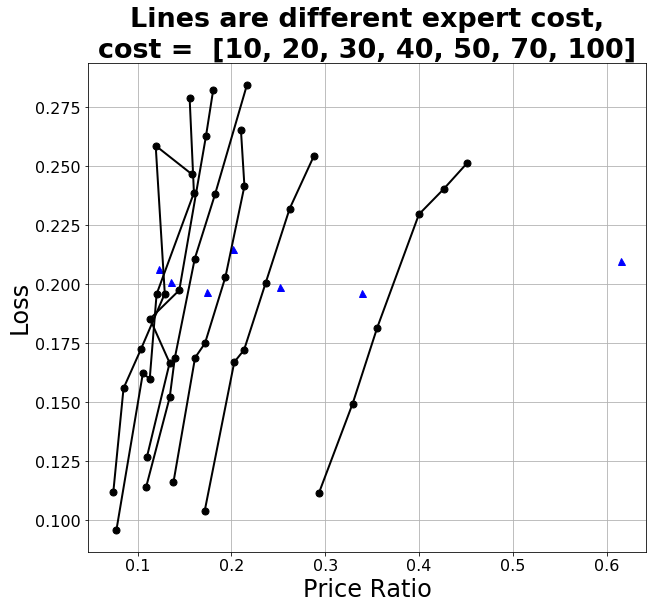

In [10]:
data = pd.read_csv('../output_data/fig2_expert_cost.csv')

fig, ax = plt.subplots(figsize=fig_size)
# colors = ['green', 'green', 'red', 'red']
colors = ['blue', 'black']
algos = ['Crowd-Ensemble', 'Hybrid-Ensemble']
ax.set_color_cycle(colors)

markers = ['^', 'o']
def plot_alg(data, alg, marker, c, col):
    print(c)
    y = data.loc[(data['algorithm'] == alg) & (data['expert_cost'] == c)]['loss_mean'].values
    x = data.loc[(data['algorithm'] == alg) & (data['expert_cost'] == c)]['price_mean'].values
    x /= c
    err = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == 50) & (data['expert_cost'] == c)]['loss_std'].values
    plt.plot(x, y, label=alg, marker=marker, color =col, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1, capsize=2)

expert_cost = data['expert_cost'].unique()
# expert_vote_cost = [10, 30]
for alg, marker, col in zip(algos, markers, colors):
    for c in expert_cost: 
        plot_alg(data, alg, marker, c, col)

plt.title('Lines are different expert cost,\ncost =  [10, 20, 30, 40, 50, 70, 100]', size=title_size, fontweight='bold')
plt.xlabel('Price Ratio', size=axes_size)
plt.ylabel('Loss', size=axes_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
# plt.ylim((0., 0.5))
# plt.legend(fontsize = 25)
plt.grid()
# fig.savefig('expert_cost.png', format='png', dpi=500)

# 5. Chart : Price Ratio vs Expert cost

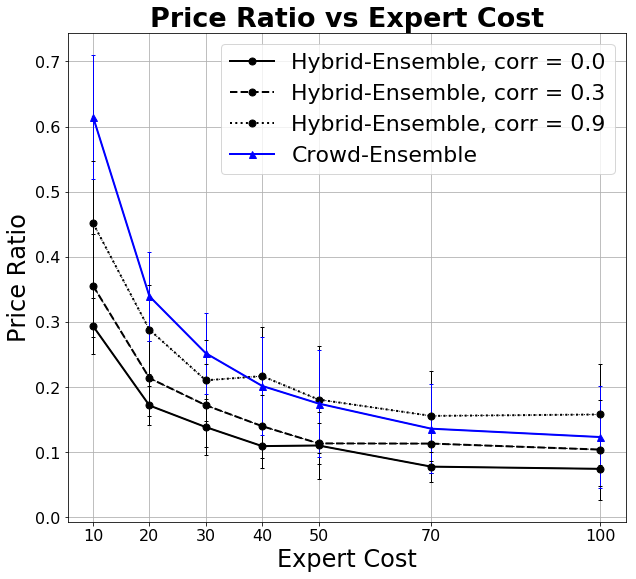

In [11]:
from operator import truediv
data = pd.read_csv('../output_data/fig2_expert_cost.csv')

fig, ax = plt.subplots(figsize=fig_size)

expert_cost = data['expert_cost'].unique()
x = expert_cost

corr_list = data['corr'].unique()
# for corr in corr_list:
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == 50) 
                 & (data['corr'] == corr)]['price_mean'].values
    y = list(map(truediv, y, x))
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == 50) 
                 & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    err = list(map(truediv, err, x))
    plt.errorbar(x, y, yerr=err, linewidth=err_line_width, color='black', linestyle=s, capsize=caps_size)
 
for corr in [0.]:
    y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0) 
                 & (data['corr'] == corr)]['price_mean'].values
    y = list(map(truediv, y, x))
    err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0) 
                 & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
    err2 = list(map(truediv, err2, x))
    plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Price Ratio vs Expert Cost', size=title_size, fontweight='bold')
plt.ylabel('Price Ratio', size=axes_size)
plt.xlabel('Expert Cost', size=axes_size)
# plt.ylim((0., 0.5))
plt.xticks(x)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.legend(fontsize = legend_size)
plt.grid()
# fig.savefig('price_expert_cost.png', format='png', dpi=500)

# 6. Chart: Test different theta (proportion of relevant items)

Theta in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

## 6.1 Chart: Recall vs Proportion of positive item

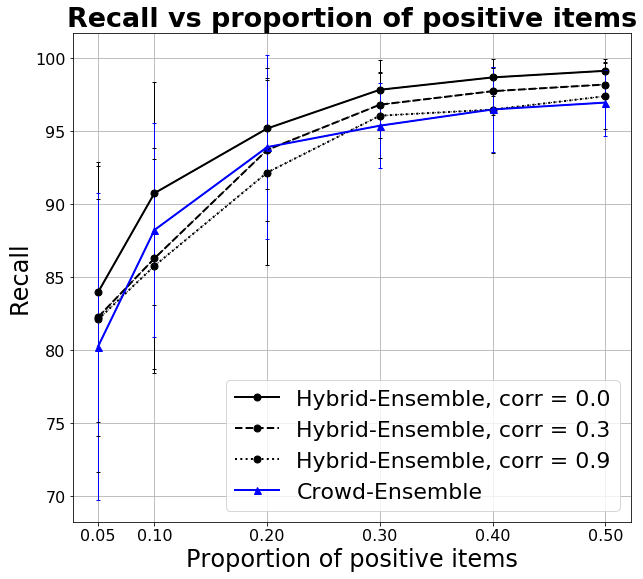

In [12]:
data = pd.read_csv('../output_data/fig4_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Recall vs proportion of positive items', size=title_size, fontweight='bold')
plt.ylabel('Recall', size=axes_size)
plt.xlabel('Proportion of positive items', size=axes_size)
# plt.ylim((70., 102))
plt.xticks(x)
plt.legend(fontsize = legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('figX.png', format='png', dpi=500)

## 6.3 Chart: Loss vs Proportion of positive item

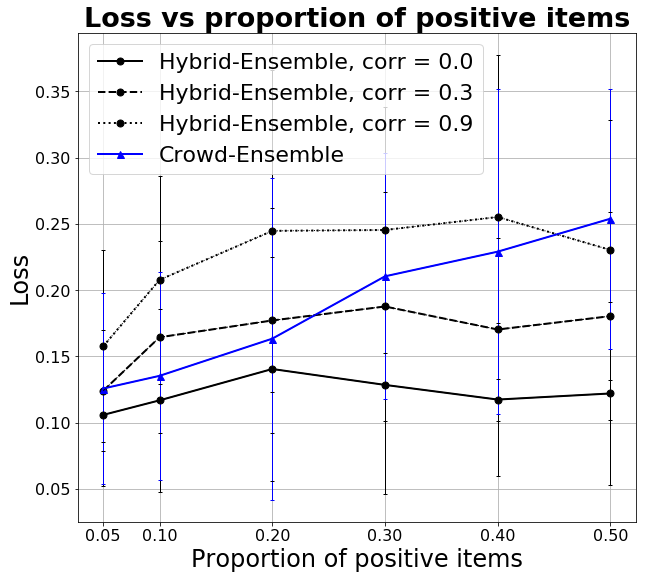

In [13]:
data = pd.read_csv('../output_data/fig4_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['loss_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['loss_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['loss_mean'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['loss_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Loss vs proportion of positive items', size=title_size, fontweight='bold')
plt.ylabel('Loss', size=axes_size)
plt.xlabel('Proportion of positive items', size=axes_size)
# plt.ylim((70., 102))
plt.xticks(x)
plt.legend(fontsize = legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('figX.png', format='png', dpi=500)

## 6.3 Chart: Price Ration vs Proportion of positive item

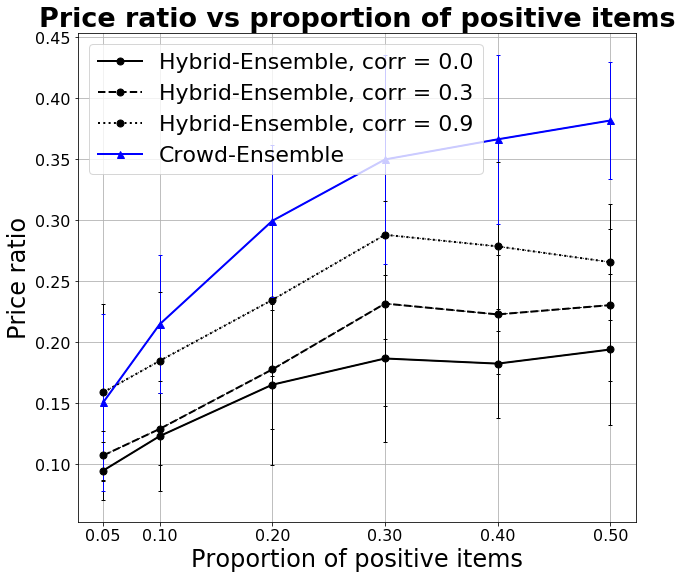

In [14]:
data = pd.read_csv('../output_data/fig4_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=fig_size)

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
    plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_mean'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



plt.title('Price ratio vs proportion of positive items', size=title_size, fontweight='bold')
plt.ylabel('Price ratio', size=axes_size)
plt.xlabel('Proportion of positive items', size=axes_size)
# plt.ylim((70., 102))
plt.xticks(x)
plt.legend(fontsize = legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('figX.png', format='png', dpi=500)

# 7. Chart: Test different filters number

## 7.1 Chart: Recall vs Filters number

filters number = [1, 2, 3, 4, 5]

In [22]:
# data = pd.read_csv('../output_data/fig5_filters_num.csv')

# data['price_mean'] /= 20
# data['price_std'] /= 20

# fig, ax = plt.subplots(figsize=fig_size)

# x = data['filters_num'].unique()
# for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
#     y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall'].values
#     err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall_std'].values
#     plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
# y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall'].values
# err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall_std'].values
# plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
# err2 = list(map(truediv, err2, x))
# plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



# plt.title('Recall vs Filters number', size=title_size, fontweight='bold')
# plt.ylabel('Recall', size=axes_size)
# plt.xlabel('Filters number', size=axes_size)
# plt.ylim((91., 101))
# plt.legend(fontsize = legend_size)
# plt.xticks(x)
# plt.grid()
# plt.tick_params(axis='both', which='major', labelsize=label_size)
# # fig.savefig('figX.png', format='png', dpi=500)

## 7.2 Chart: Price Ratio vs Filters number

In [16]:
# data = pd.read_csv('../output_data/fig5_filters_num.csv')

# data['price_mean'] /= 20
# data['price_std'] /= 20

# fig, ax = plt.subplots(figsize=fig_size)

# x = data['filters_num'].unique()
# for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
#     y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_mean'].values
#     err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_std'].values
#     plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
# y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_mean'].values
# err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_std'].values
# plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='blue', linewidth=line_width, markersize=marker_size)
# err2 = list(map(truediv, err2, x))
# plt.errorbar(x, y, yerr=err, color='blue', capsize=caps_size, linewidth=err_line_width)



# plt.title('Price Ratio vs Filters number', size=title_size, fontweight='bold')
# plt.ylabel('Price Ratio', size=axes_size)
# plt.xlabel('Filters number', size=axes_size)
# plt.xticks(x)
# # plt.ylim((91., 101))
# plt.legend(fontsize = legend_size)
# plt.xticks(x)
# plt.grid()
# plt.tick_params(axis='both', which='major', labelsize=label_size)
# # fig.savefig('figX.png', format='png', dpi=500)

## 7.3 Chart: Recall vs Price Ratio, dots are correlation = [0., 0.2, 0.3, 0.5, 0.7, 0.9]

In [17]:
# data = pd.read_csv('../output_data/fig5_filters_num.csv')
# data['price_mean'] /= 20
# data['price_std'] /= 20

# fig, ax = plt.subplots(figsize=fig_size)


# for f, s in zip([1, 3, 5], ['-', '--', ':']):
#     y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['recall'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['price_mean'].values
#     err_y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['recall_std'].values
#     plt.plot(x, y, label='Hybrid-Ensemble, #filters = {}'.format(f), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err_y, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
# for f, m in zip([1, 3, 5], ['>', '*', 'o']):
#     y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['recall'].values
#     x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['price_mean'].values
#     err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['recall_std'].values
#     plt.plot(x, y, label='Crowd-Ensemble, #filters = {}'.format(f), marker=m, color='blue', linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err_y, color='blue', linestyle=s, capsize=caps_size, linewidth=err_line_width)



# plt.title('Recall vs Price Ratio\ndots are correlation = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=title_size, fontweight='bold')
# plt.ylabel('Recall', size=axes_size)
# plt.xlabel('Price Ratio', size=axes_size)
# plt.legend(fontsize = legend_size)
# plt.xticks(x)
# plt.grid()
# plt.tick_params(axis='both', which='major', labelsize=label_size)
# # fig.savefig('figX.png', format='png', dpi=500)

## 7.4 Chart: Recall vs Price Ratio, dots are #filters = [1, 2, 3, 4, 5]

In [18]:
# data = pd.read_csv('../output_data/fig5_filters_num.csv')
# data['price_mean'] /= 20
# data['price_std'] /= 20

# fig, ax = plt.subplots(figsize=fig_size)


# for c, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
#     y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['price_mean'].values
#     err_y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall_std'].values
#     plt.plot(x, y, label='Hybrid-Ensemble, cor = {}'.format(c), marker='o', color='black', linestyle=s, linewidth=line_width, markersize=marker_size)
#     plt.errorbar(x, y, yerr=err_y, color='black', linestyle=s, capsize=caps_size, linewidth=err_line_width)
 
# y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['recall'].values
# x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['price_mean'].values
# err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['recall_std'].values
# plt.plot(x, y, label='Crowd-Ensemble'.format(f), marker='^', color='blue', linewidth=line_width, markersize=marker_size)
# plt.errorbar(x, y, yerr=err_y, color='blue', linestyle=s, capsize=caps_size, linewidth=err_line_width)



# plt.title('Recall vs Price Ratio\ndots are #filters = [1, 2, 3, 4, 5]', size=title_size, fontweight='bold')
# plt.ylabel('Recall', size=axes_size)
# plt.xlabel('Price Ratio', size=axes_size)
# # plt.ylim((91., 101))
# plt.legend(fontsize = legend_size)
# plt.xticks(x)
# plt.grid()
# plt.tick_params(axis='both', which='major', labelsize=label_size)
# # fig.savefig('figX.png', format='png', dpi=500)

 # 9. Chart: Different paramters of filters

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


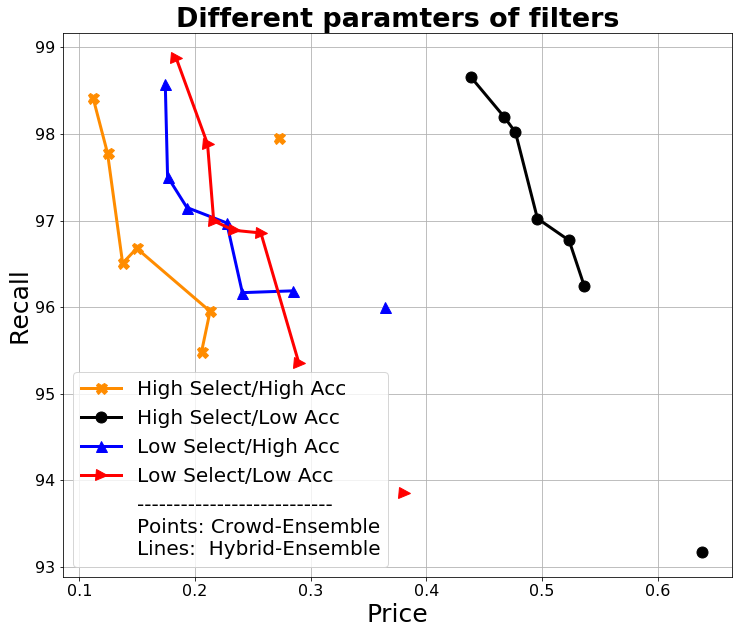

In [19]:
data = pd.read_csv('../output_data/fig_balances_acc_select.csv')
data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(12,10))
colors = ['darkorange', 'darkorange', 'black', 'black', 'blue', 'blue', 'red', 'red']
ax.set_color_cycle(colors)

markers = ['X', 'o', '^', '>']

def plot_alg(data, setting, marker, algo):
    y = data.loc[(data['algorithm'] == algo) & (data['label'] == setting)]['recall'].values
    x = data.loc[(data['algorithm'] == algo) & (data['label'] == setting)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == algo) & (data['label'] == setting)]['recall_std'].values
    if algo == 'Crowd-Ensemble':
        plt.plot(x, y, marker=marker, linewidth=line_width, markersize=marker_size+4)
    else:
        plt.plot(x, y, label=setting, marker=marker, linewidth=line_width+1, markersize=marker_size+4)
#     plt.errorbar(x, y, yerr=err_y, marker=marker, linewidth=err_line_width, capsize=caps_size)

algos = ['Hybrid-Ensemble', 'Crowd-Ensemble'] 
setting_lists = ['High Select/High Acc', 'High Select/Low Acc', 'Low Select/High Acc', 'Low Select/Low Acc']
for setting, marker in zip(setting_lists, markers):
    for algo in algos:
        plot_alg(data, setting, marker, algo)

plt.plot([0.5], [97], label='---------------------------\nPoints: Crowd-Ensemble\nLines:  Hybrid-Ensemble', color='w')

plt.title("Different paramters of filters", size=title_size, fontweight='bold')
plt.xlabel('Price', size=axes_size+1)
plt.ylabel('Recall', size=axes_size+1)
plt.legend(fontsize = legend_size-2)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.grid()

# fig.savefig('balances_acc_select.png', format='png', dpi=400)